In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'drive', 'sample_data']


In [ ]:
hdata = pd.read_csv('/content/drive/MyDrive/DATASETS/heart.csv')

In [ ]:
hdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Checking The Data Size Both Column and Row**

In [ ]:
hdata.shape

(303, 14)

**Is there any null value present in the dataset or not.**

In [ ]:
hdata.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
hdata.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
print(hdata.corr()["target"].abs().sort_values(ascending=True))

fbs         0.028046
chol        0.085239
restecg     0.137230
trestbps    0.144931
age         0.225439
sex         0.280937
thal        0.344029
slope       0.345877
ca          0.391724
thalach     0.421741
oldpeak     0.430696
cp          0.433798
exang       0.436757
target      1.000000
Name: target, dtype: float64


Here we can see fbs is less correlated with target. 

In [ ]:
y = hdata['target']

1    165
0    138
Name: target, dtype: int64


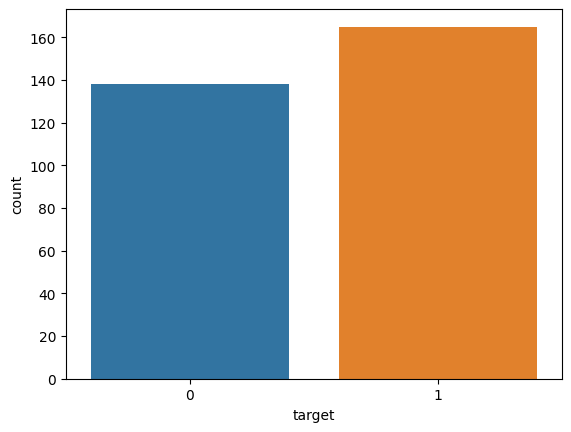

In [ ]:
ax = sns.countplot(x ='target', data = hdata)
target_temp = hdata.target.value_counts()
print(target_temp)
plt.show()

In [ ]:
print("Percentage of patients with heart disease: " + str(round(target_temp[1]*100/303,3)))
print("Percentage of patients without heart disease: " + str(round(target_temp[0]*100/303,3)))

Percentage of patients with heart disease: 54.455
Percentage of patients without heart disease: 45.545


From the above we can see that 165 (54.455%)patients have a heart disease within 303 patients.

In [ ]:
countFemale = len(hdata[hdata.sex == 0])
countMale = len(hdata[hdata.sex == 1])
print("Percentage of Female Patients are:{:.2f}%".format((countFemale)/(len(hdata.sex))*100))
print("Percentage of Female Patients are:{:.2f}%".format((countMale)/(len(hdata.sex))*100))

Percentage of Female Patients are:31.68%
Percentage of Female Patients are:68.32%


**Now We'll analyse 'sex', 'cp:chest pain', 'fbs:fasting blood sugar', 'restecg:Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)', 'exang:Exercise induced angina (1 = yes; 0 = no)', 'slope:the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)', 'ca:The number of major vessels (0-3)' and 'thal:A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)' features**

# **Analysing the Sex Feature**

In [ ]:
hdata["sex"].unique()


array([1, 0])

<Axes: xlabel='sex', ylabel='target'>

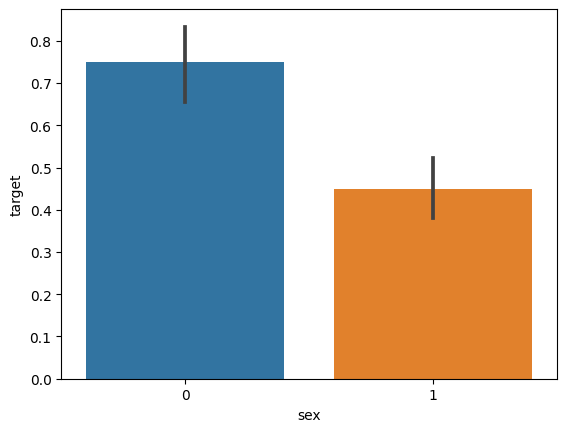

In [ ]:
sns.barplot(x = 'sex',y = 'target',data = hdata)

# **Analysing the Chest Pain Type features**

In [ ]:
hdata["cp"].unique()

array([3, 2, 1, 0])

<Axes: xlabel='cp', ylabel='target'>

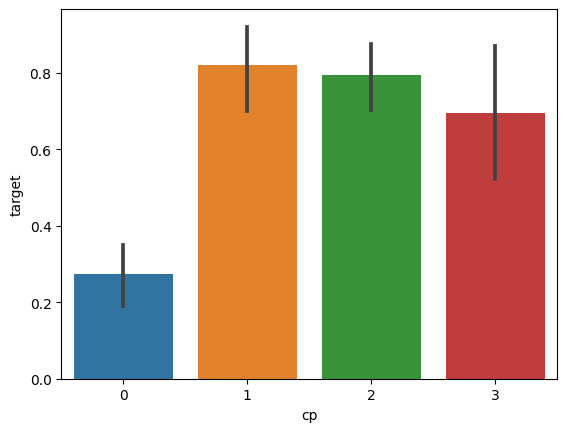

In [ ]:
sns.barplot(x = 'cp',y = 'target',data = hdata)

# **Analysing the FBS features**

In [ ]:
hdata["fbs"].unique()

array([1, 0])

<Axes: xlabel='fbs', ylabel='target'>

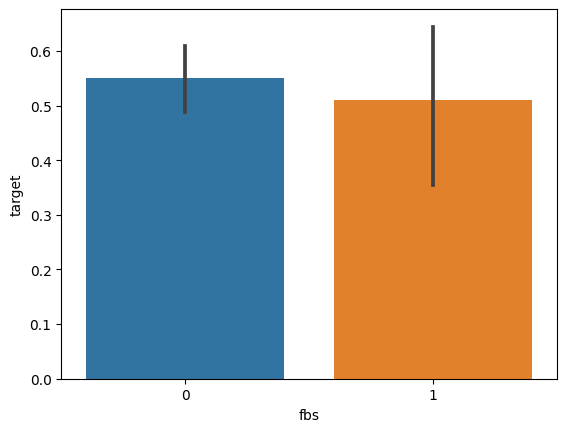

In [ ]:
sns.barplot(x = 'fbs',y = 'target',data = hdata)

# **Analysing the restecg feature**

In [ ]:
hdata["restecg"].unique()

array([0, 1, 2])

<Axes: xlabel='restecg', ylabel='target'>

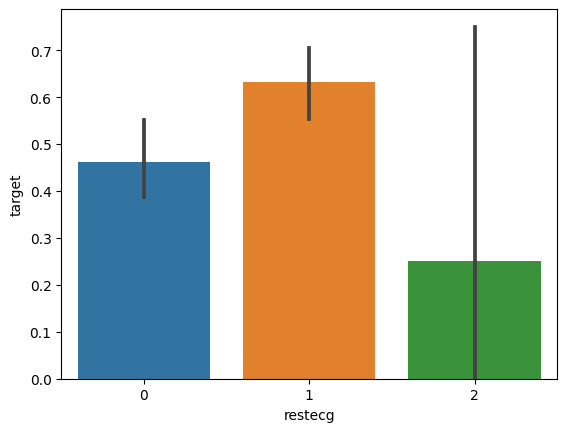

In [ ]:
sns.barplot(x = 'restecg',y = 'target',data = hdata)

# **Analysing the exang feature**

In [ ]:
hdata["exang"].unique()

array([0, 1])

<Axes: xlabel='exang', ylabel='target'>

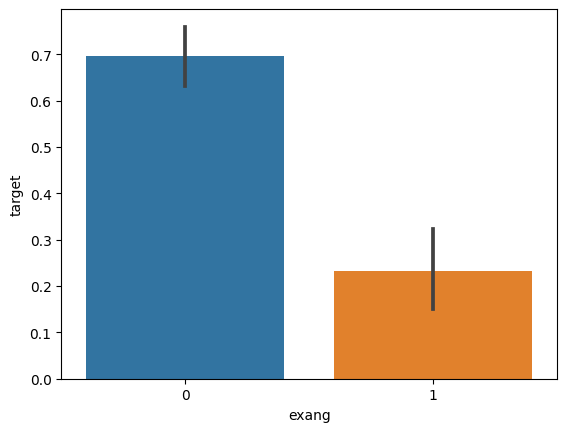

In [ ]:
sns.barplot(x = 'exang',y = 'target',data = hdata)

# **Analysing the slope feature**

In [ ]:
hdata["slope"].unique()

array([0, 2, 1])

<Axes: xlabel='slope', ylabel='target'>

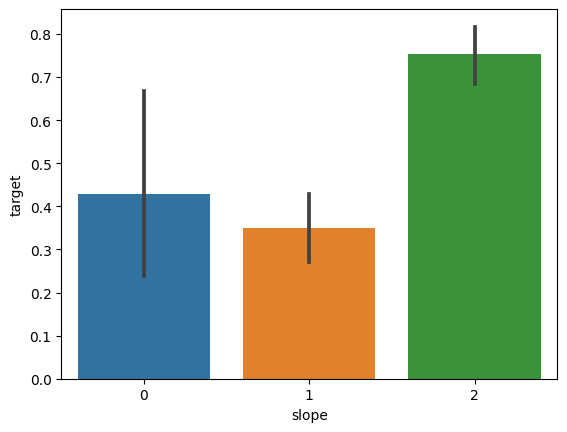

In [ ]:
sns.barplot(x = 'slope',y = 'target',data = hdata)

# **Analysing the ca feature**

In [ ]:
hdata["ca"].unique()

array([0, 2, 1, 3, 4])

<Axes: xlabel='ca', ylabel='target'>

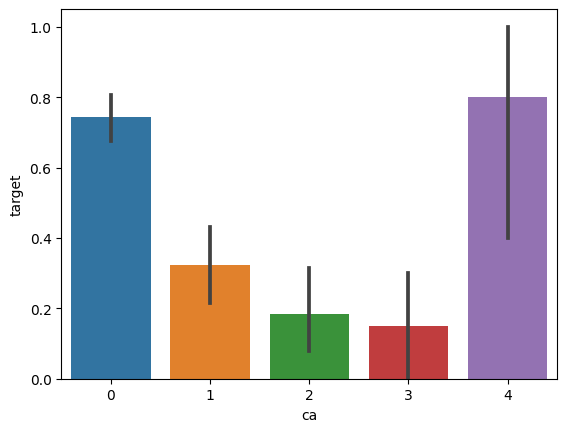

In [ ]:
sns.barplot(x = 'ca',y = 'target',data = hdata)

# **Analysing The person's resting blood pressure**

In [ ]:
hdata["trestbps"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

<Axes: xlabel='trestbps', ylabel='target'>

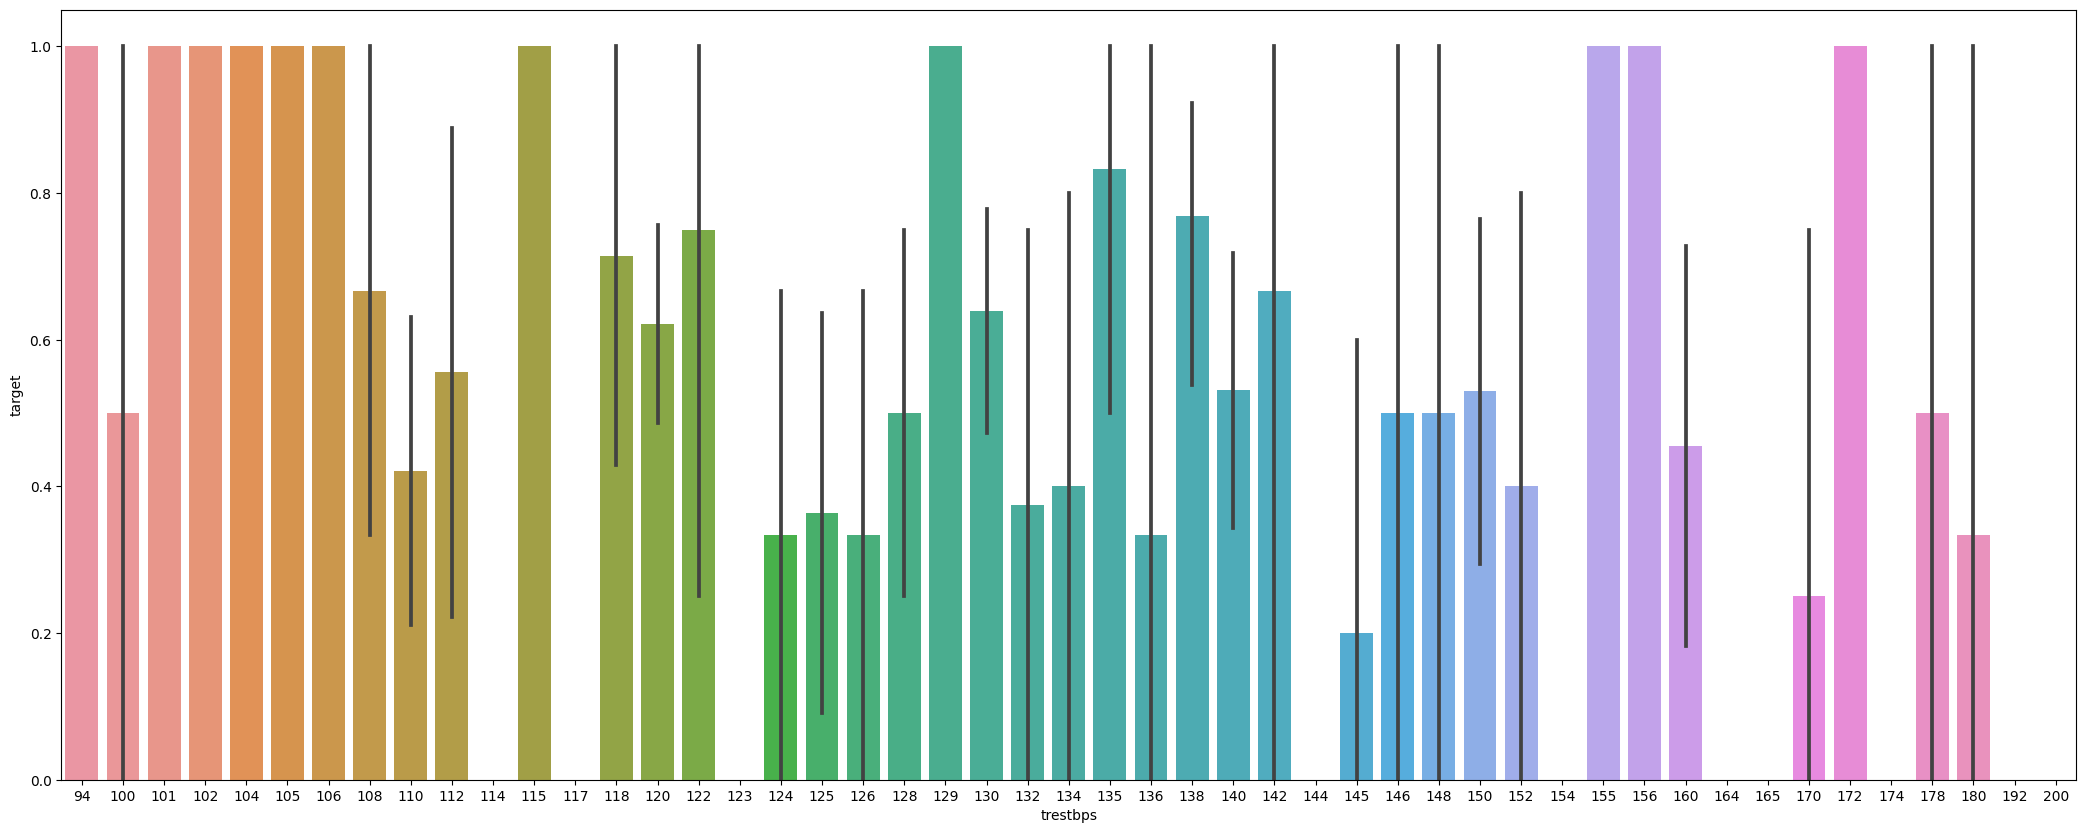

In [ ]:
plt.figure(figsize=(26, 10))
sns.barplot(x = 'trestbps',y = 'target', data = hdata)

# **Analysing the thal feature**

In [ ]:
hdata["thal"].unique()

array([1, 2, 3, 0])

<Axes: xlabel='thal', ylabel='target'>

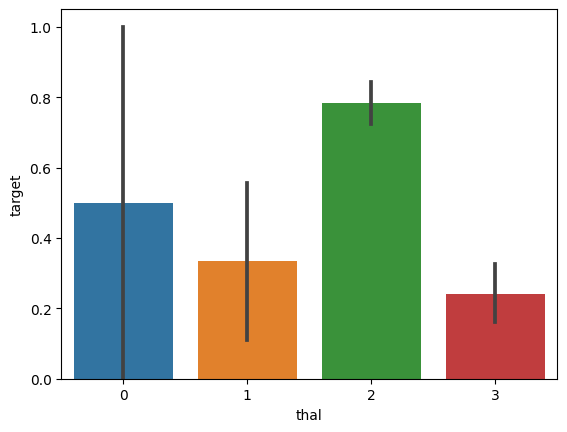

In [ ]:
sns.barplot(x = 'thal',y = 'target',data = hdata)

# **Heart Disease Frequency for ages**

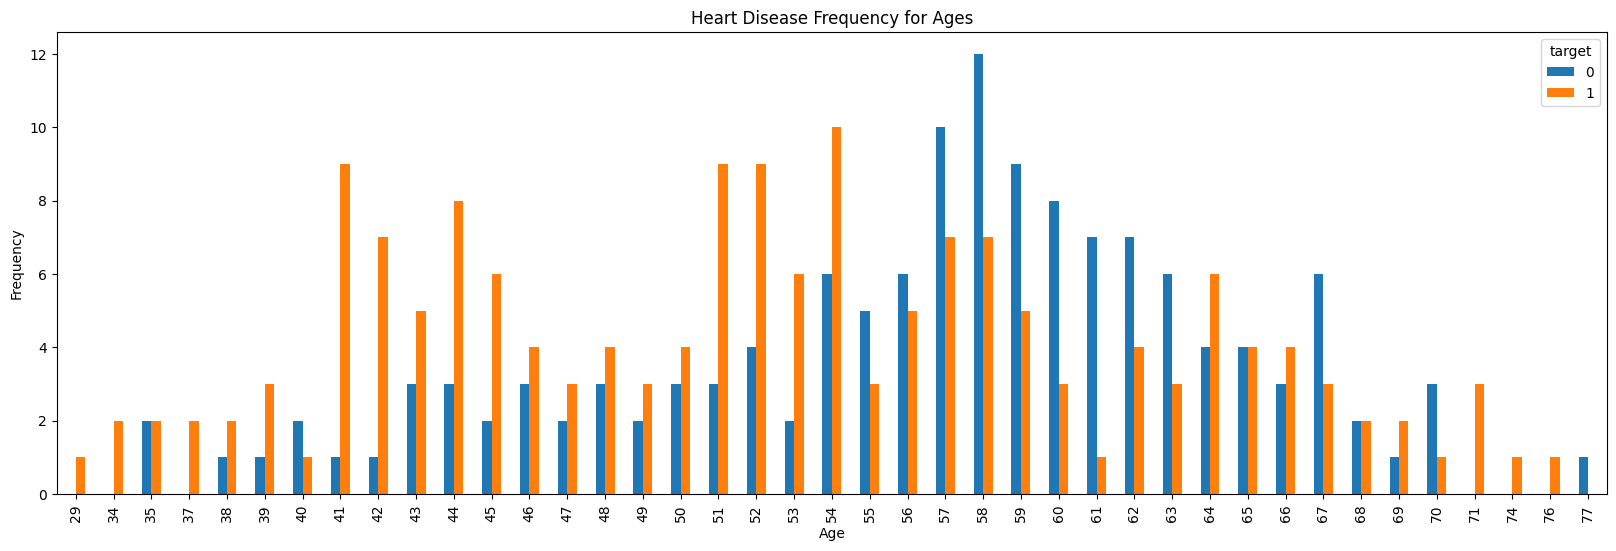

In [ ]:
pd.crosstab(hdata.age,hdata.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

# **Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)**

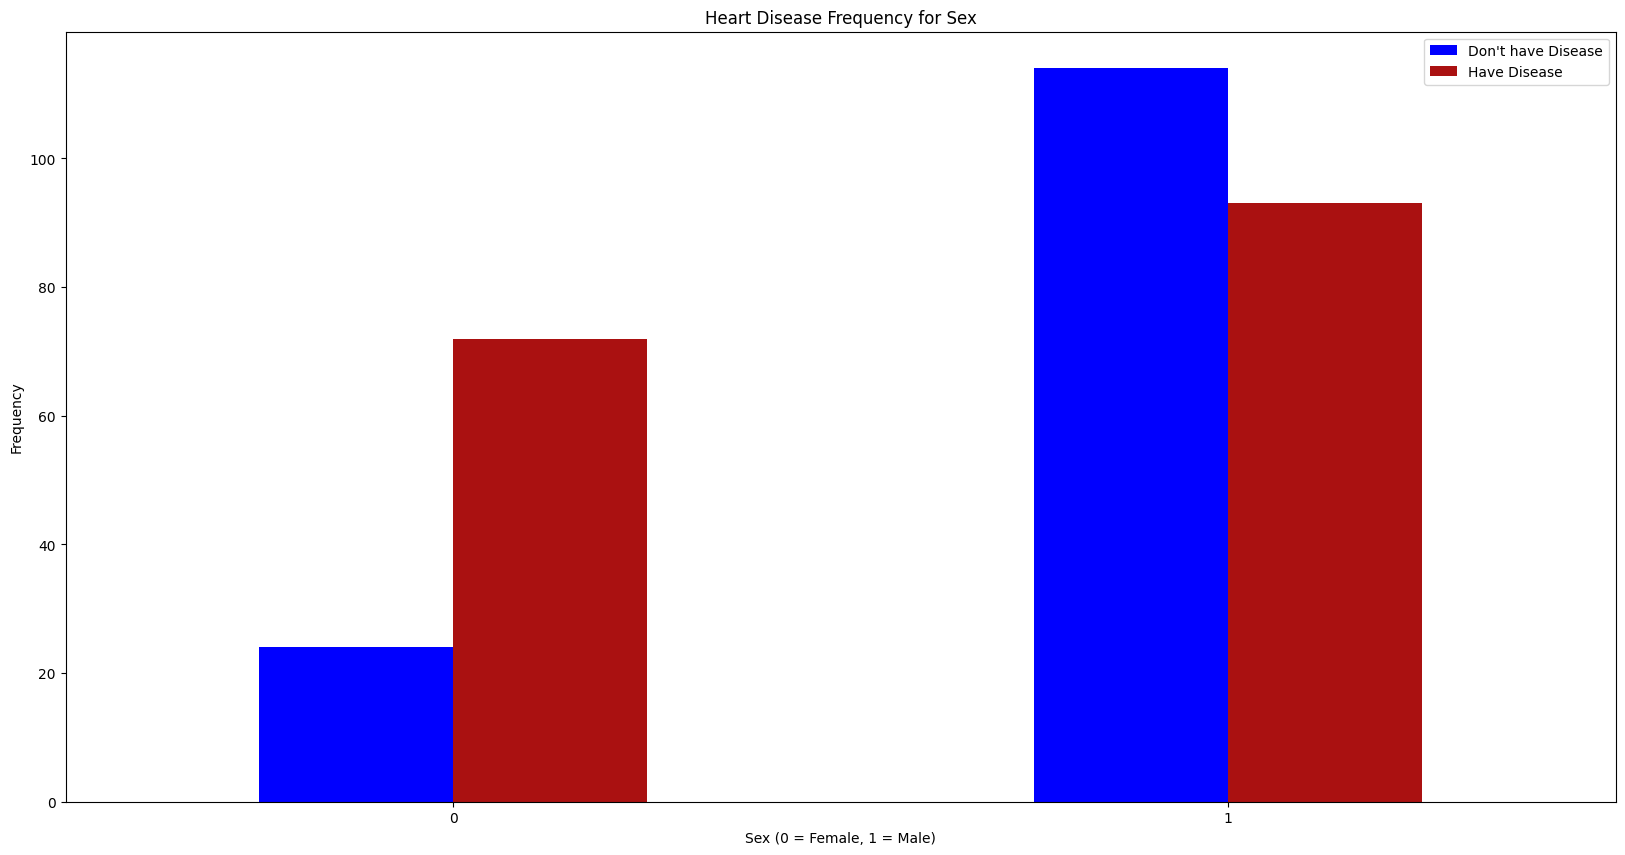

In [ ]:
pd.crosstab(hdata.sex,hdata.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

# **Heart disease according to Fasting Blood sugar**

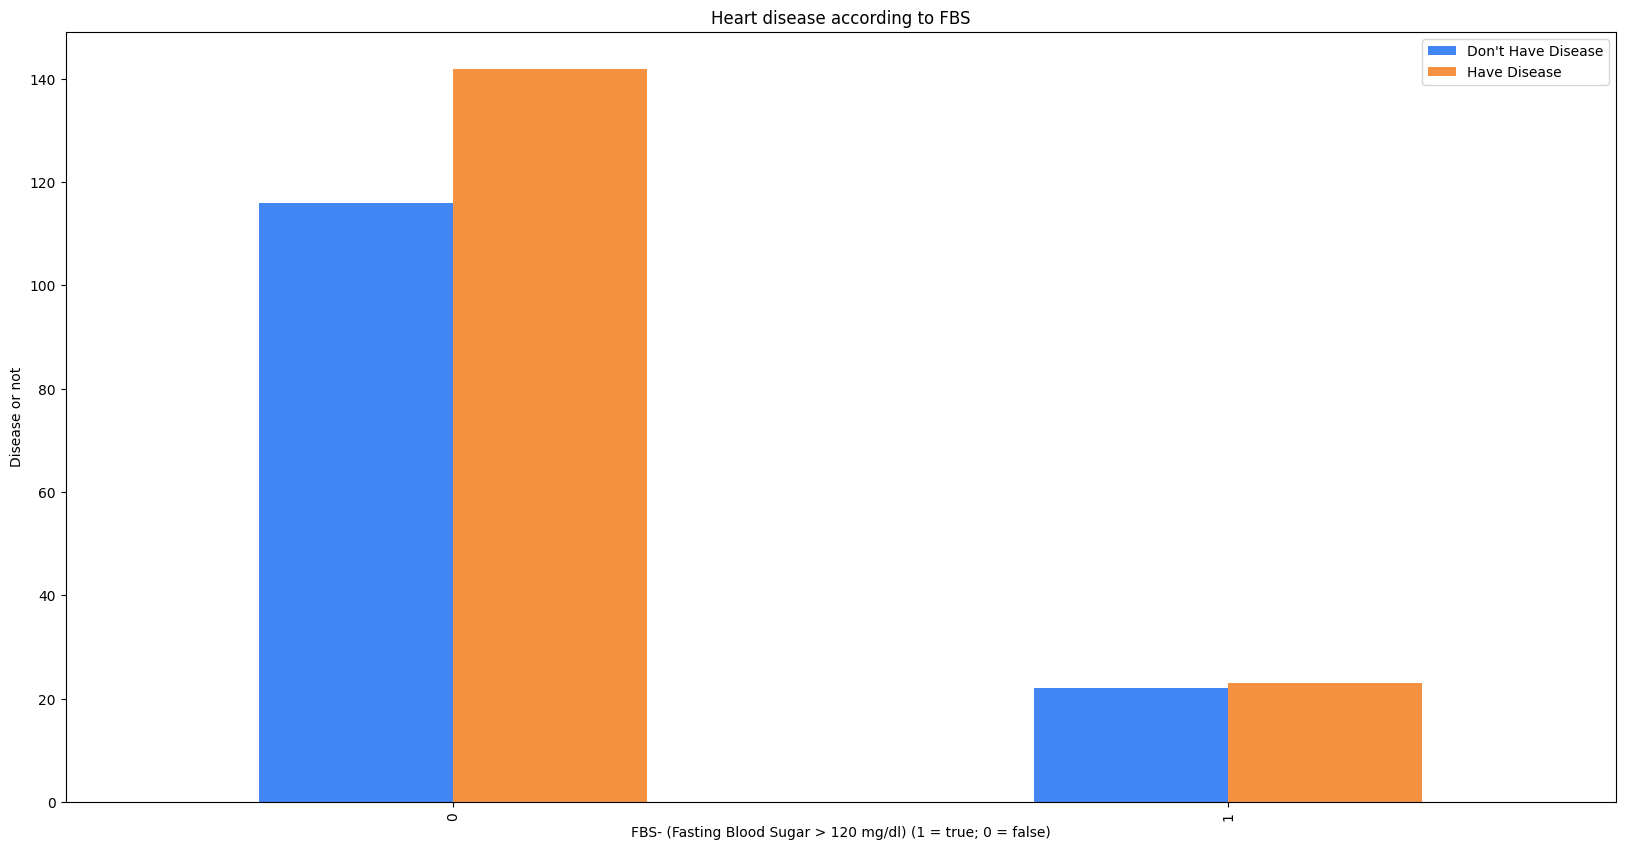

In [ ]:
pd.crosstab(hdata.fbs,hdata.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

# **Train Test split**

In [ ]:
from sklearn.model_selection import train_test_split

predictors = hdata.drop("target",axis=1)
target = hdata["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
X_train.shape

(242, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
Y_train.shape

(242,)

In [ ]:
Y_test.shape

(61,)

In [ ]:
from sklearn.metrics import accuracy_score

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred_lr, Y_test)*100,2)
print("The accuracy score using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score using Logistic Regression is: 85.25 %


# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred_nb = nb.predict(X_test)
score_nb = round(accuracy_score(Y_pred_nb, Y_test)*100,2)
print("The accuracy score using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score using Naive Bayes is: 85.25 %


# **SVM**

In [ ]:
from sklearn import svm

sv = svm.SVC(kernel ='linear')
sv.fit(X_train, Y_train)
Y_pred_sv = sv.predict(X_test)
score_sv = round(accuracy_score(Y_pred_sv, Y_test)*100,2)
print("The accuracy score using Linear SVM is: "+str(score_sv)+" %")

The accuracy score using Linear SVM is: 81.97 %


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
score_knn = round(accuracy_score(Y_pred_knn, Y_test)*100,2)
print("The accuracy score using KNN is: "+str(score_knn)+" %")

The accuracy score using KNN is: 67.21 %


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(2000):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score using Decision Tree is: "+str(score_dt)+" %")

The accuracy score using Decision Tree is: 81.97 %


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(3000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score using Random Forest is: "+str(score_rf)+" %")

The accuracy score using Random Forest is: 90.16 %


# **XGBoost**

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 78.69 %


# **Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=500)

Epoch 1/500
8/8 [==============================] - 1s 4ms/step - loss: 2.3224 - accuracy: 0.5579
Epoch 2/500
8/8 [==============================] - 0s 5ms/step - loss: 2.0919 - accuracy: 0.5455
Epoch 3/500
8/8 [==============================] - 0s 5ms/step - loss: 1.7000 - accuracy: 0.5826
Epoch 4/500
8/8 [==============================] - 0s 4ms/step - loss: 1.5701 - accuracy: 0.5826
Epoch 5/500
8/8 [==============================] - 0s 3ms/step - loss: 1.4513 - accuracy: 0.5702
Epoch 6/500
8/8 [==============================] - 0s 5ms/step - loss: 1.3674 - accuracy: 0.5620
Epoch 7/500
8/8 [==============================] - 0s 5ms/step - loss: 1.3327 - accuracy: 0.5744
Epoch 8/500
8/8 [==============================] - 0s 4ms/step - loss: 1.2469 - accuracy: 0.5744
Epoch 9/500
8/8 [==============================] - 0s 4ms/step - loss: 1.1945 - accuracy: 0.5785
Epoch 10/500
8/8 [==============================] - 0s 5ms/step - loss: 1.1351 - accuracy: 0.6074
Epoch 11/500
8/8 [===========

In [ ]:
Y_pred_nn = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy using Neural Network is: "+str(score_nn)+" %")

The accuracy using Neural Network is: 85.25 %


# **Final Output**

In [ ]:
scores = [score_lr,score_nb,score_sv,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score using "+algorithms[i]+" is: "+str(scores[i])+" %")


The accuracy score using Logistic Regression is: 85.25 %
The accuracy score using Naive Bayes is: 85.25 %
The accuracy score using Support Vector Machine is: 81.97 %
The accuracy score using K-Nearest Neighbors is: 67.21 %
The accuracy score using Decision Tree is: 81.97 %
The accuracy score using Random Forest is: 90.16 %
The accuracy score using XGBoost is: 78.69 %
The accuracy score using Neural Network is: 85.25 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

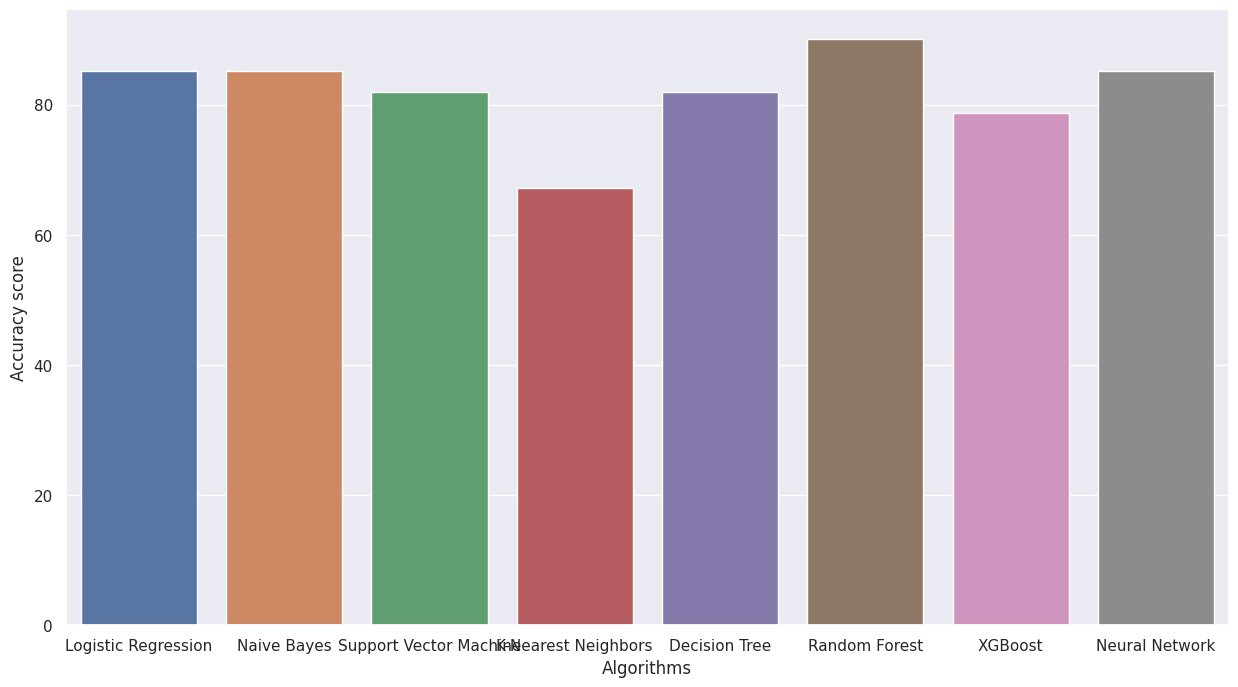

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)